Here we will try with new method(median) of calculeting privet center of cluster, and we will cheack privacy gaurenty at most risky points

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import balanced_accuracy_score
import numpy as np
np.random.seed(42)
from collections import Counter
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

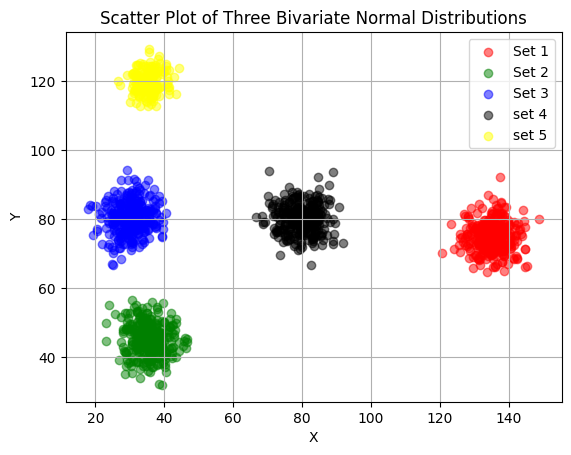

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the three bivariate normal distributions
means = [[135, 75], [35, 45], [30, 80],[80,80],[35,120]]
covariances = [[[20, 0], [0, 20]], [[20, 0], [0, 20]],[[20, 0], [0, 20]],[[20, 0], [0, 20]], [[10, 0], [0, 10]]]
sizes = [305, 305,305,305, 185]

# Generate 2D data from the three bivariate normal distributions
data_sets = [np.random.multivariate_normal(means[i], covariances[i], sizes[i]) for i in range(5)]
# print(data_sets)
# Plot the scatter plot for each data set
colors = ['red', 'green', 'blue','black','yellow']
labels = ['Set 1', 'Set 2', 'Set 3','set 4','set 5']

for i in range(5):
    plt.scatter(data_sets[i][:, 0], data_sets[i][:, 1], alpha=0.5, color=colors[i], label=labels[i])

# Add labels and legend
plt.title('Scatter Plot of Three Bivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X=np.concatenate(data_sets)
X

array([[137.22137322,  74.38166325],
       [137.8965512 ,  81.81119658],
       [133.95283427,  73.9529077 ],
       ...,
       [ 34.69811554, 114.3830159 ],
       [ 34.74512121, 117.36564544],
       [ 37.89471822, 118.26220107]])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def outerlayers(X, k):
    km = KMeans(n_clusters=k)
    km.fit_predict(X)
    center = km.cluster_centers_
    label = km.labels_
    selected_indices = []

    for lab in range(k):
        indices = np.where(label == lab)[0]  # Extract indices from the tuple
        dist = []
        for i in indices:
            dist.append((np.linalg.norm(X[i] - center[lab])**2, i))  # Calculate squared Euclidean distance

        sorted_lst = sorted(dist, key=lambda x: x[0], reverse=True)

        # Extract the indices of the first 10 elements
        result = [idx for _, idx in sorted_lst[:len(indices)//20]]
        selected_indices.extend(result)

    return selected_indices



point_to_check=outerlayers(X,5)
np.random.shuffle(point_to_check)
point_to_check

[440,
 381,
 142,
 644,
 1129,
 215,
 824,
 978,
 239,
 1096,
 354,
 37,
 1253,
 985,
 745,
 797,
 189,
 272,
 582,
 530,
 1287,
 747,
 902,
 575,
 967,
 291,
 1059,
 1372,
 795,
 807,
 56,
 104,
 963,
 550,
 327,
 1152,
 287,
 1017,
 726,
 673,
 110,
 1235,
 580,
 1400,
 1275,
 1041,
 466,
 1297,
 769,
 616,
 1092,
 875,
 1121,
 131,
 335,
 677,
 1260,
 781,
 126,
 377,
 1012,
 334,
 1060,
 210,
 488,
 1278,
 955,
 323,
 89]

In [ ]:
km1 =KMeans(n_clusters=5, max_iter=5)
y_predicted = km1.fit_predict(X)
B=np.array(km1.cluster_centers_)

print("Roughly kmean center :", B)

Roughly kmean center : [[ 35.29172148 120.0173101 ]
 [ 79.75761694  80.22068328]
 [134.94504739  74.96606143]
 [ 30.12284424  80.37581404]
 [ 35.39855834  45.35894576]]


In [ ]:
import numpy as np
import pandas as pd

def aglo2(X, B, k,t):
    a = 16 * (np.log(k) + 2)
    Bi = [[] for _ in range(len(B))] # list of ponts in each cluster
    X_dist = []
    X_min_bindx = [] # it will stor index of closet center in B(rought Kmean centers)

    for i in range(len(X)):
        min_dist = 10000000000
        min_index = -1 # index of nearest center
        Xi = X[i]

        for j in range(len(B)): # calculeting distence with each centert in B
            bj =B[j]
            dist = np.sum((Xi - bj) ** 2)

            if dist < min_dist: #finding nearest center
                min_dist = dist
                min_index = j  #  updating index of nearest center

        Bi[min_index].append(X[i]) # append in nearest cluster
        X_dist.append(min_dist) # distence from nearest clustre center in B
        X_min_bindx.append(min_index)

    c_phi = 0 # sum of all distence of all point with neares centre in B
    for i in range(len(X)):
        c_phi += X_dist[i]

    S_x = []
    sigma_s = 0

    for i in range(len(X)):
        b_index = X_min_bindx[i]
        if len(Bi[b_index])<2*t: # if cluster size is less then corset size, ignore that cluster
          continue
        bi = B [b_index]
        si = 0
        si += (a * X_dist[i]) / (c_phi)

        temp_sum = 0

        for j in range(len(Bi[b_index])):
            temp_sum += np.sum((bi - Bi[b_index][j]) ** 2)

        si += (2 * a * temp_sum) / (len(Bi[b_index]) * c_phi)
        si += 4 * len(X) / len(Bi[b_index])
        S_x.append(si)
        sigma_s += si
    if len(S_x)==0:
      return -1;
    p_x = []
    for i in range(len(S_x)):
        p_x.append(S_x[i] / sigma_s)
    np.random.shuffle(p_x)
    return np.argmax(p_x)

In [ ]:
def k_closest_points(points, k, i):
    distances = []
    for point in points:
        distance = np.sqrt(np.sum((point -  points[i])** 2))
        distances.append((distance, point))
    return sorted(range(len(distances)), key=lambda i: distances[i])[:k]

import numpy as np
import random

def privet_center(points, E):
    center = []
    for x in range(points.shape[1]):
        co_ordinates = [i[x] for i in points]
        min_v = min(co_ordinates)
        max_v = max(co_ordinates)
        median=np.median(co_ordinates)
        mean_dif=np.mean([abs(i-median) for i in co_ordinates])
        s = np.sum(co_ordinates) - len(co_ordinates) * (median) + np.random.laplace(scale= mean_dif / E)
        c = len(co_ordinates) + np.random.laplace(scale=2 / E)
        if c <= 1:
            center.append(median)
        else:
            center.append((s / c) + (median))
    return center

In [ ]:
import math
# print(point_got)
def Private_k_Mean(P,k, B, t,E):
  D=[]
  n=len(P)
  while len(P)>2*k*t :
    c_index=aglo2(P, B, k,t)
    t_index=k_closest_points(P,t,c_index)
    c=privet_center(P[t_index],E)
    P=np.delete(P,t_index, axis=0)

    D.append(c)

  return np.array(D)


In [ ]:
def cost(X,centers):
  sum=0
  for i in range(len(X)):
    point1=X[i]
    cost_i=100000
    for j in range(len(centers)):
      point2=centers[j]
      if(np.sum((point1 - point2)**2)<cost_i):
        cost_i=np.sum((point1 - point2)**2)
    sum+=cost_i
  return sum

In [ ]:
#here we will calculet deference between two K centerse
def Kcenter_dif(c1, c2):
    # here we will calculate the sum of differences between each center of c1 to the nearest center in c2
    total_sum = 0
    for p1 in c1:
        total_sum += min([np.sum((p1 - p2) ** 2) for p2 in c2])
    return total_sum

def difference(set1, set2):
    return min([min([Kcenter_dif(c1, c2) for c2 in set2]) for c1 in set1])


In [ ]:
import numpy as np

def gaussian_pdf(x, mean, covariance):
    """Compute the value of the multivariate Gaussian PDF at point x."""
    d = len(mean)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    prefactor = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(np.linalg.det(covariance)))
    return prefactor * np.exp(exponent)

def kl_divergence(p, q):
    """Compute the KL divergence between two discrete distributions."""
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def kl_divergence_between_distributions(points_set1, points_set2, mean1, mean2, covariance1, covariance2):
    """Compute KL divergence between two multivariate Gaussian distributions."""
    combined_points = np.vstack([points_set1, points_set2])

    # Calculate the PDFs for each distribution at all points
    pdf1 = np.array([gaussian_pdf(x, mean1, covariance1) for x in combined_points])
    pdf2 = np.array([gaussian_pdf(x, mean2, covariance2) for x in combined_points])

    # Normalize the PDFs to represent discrete distributions
    pdf1 /= np.sum(pdf1)
    pdf2 /= np.sum(pdf2)

    # Compute the KL divergence between the two distributions
    return kl_divergence(pdf1, pdf2)

# Example usage:
def diff_cal(points_set1, points_set2):
  k = len(points_set1)  # Number of points in each set
  d = 2   # Dimensionality of the points

  mean1 = np.mean(points_set1, axis=0)  # Mean of distribution 1
  mean2 = np.mean(points_set2, axis=0)  # Mean of distribution 2
  covariance1 = np.cov(points_set1.T)  # Covariance matrix of distribution 1
  covariance2 = np.cov(points_set2.T)  # Covariance matrix of distribution 2

  # Calculate KL divergence between the distributions
  return kl_divergence_between_distributions(points_set1, points_set2, mean1, mean2, covariance1, covariance2)

# # Example usage:
# points_set1 = np.array([[1.1, 2], [2, 3.1], [3, 4]])
# points_set2 = np.array([[1, 2], [2.1, 3], [3, 4.5]])
# divergence = diff_cal(points_set1, points_set2)
# print("KL Divergence between the distributions:", divergence)

In [ ]:
# # Centers when Xi included
def privacy_measure(X,point_to_check,k,B,t):

  privacy_leak=[]
  for i in range(15):
    centers_not_take_i=np.empty((0, 2))
    centers_take_i1= np.empty((0, 2))
    centers_take_i2= np.empty((0, 2))
    indx=point_to_check[i]
    p1=Private_k_Mean(X,k , B, t, 0.1)
    p2=Private_k_Mean(X,k , B, t, 0.1)
    p3=Private_k_Mean(np.delete(X, indx,axis=0), k, B, t, 0.1)   # Assuming you dont want to include all data points


    for i in range(5):
      # Centers when Xi included
      km = KMeans(n_clusters=k)
      km.fit_predict(p1)
      c1 = km.cluster_centers_   # Centers when we want to include all data points
      centers_take_i1 = np.concatenate((centers_take_i1, c1), axis=0)

      # Centers when Xi included
      km = KMeans(n_clusters=k)
      km.fit_predict(p2)
      c1 = km.cluster_centers_   # Centers when we want to include all data points
      centers_take_i2 = np.concatenate((centers_take_i2, c1), axis=0)



      # Centers when Xi not included
      km = KMeans(n_clusters=k)
      km.fit_predict(p3)  # Centers when we don't want to include all data points
      c2 = km.cluster_centers_
      centers_not_take_i = np.concatenate((centers_not_take_i, c2), axis=0)
    privacy_leak.append([diff_cal(centers_not_take_i, centers_take_i1),diff_cal(centers_take_i1, centers_take_i2)])
    print(privacy_leak[-1])
  return privacy_leak
privacy=privacy_measure(X,point_to_check,5,B,10)


[0.00018829985986545798, 5.958332875953197e-05]
[0.00013560051596267386, 0.0004234610156430901]
[0.00015257693611034822, 1.6752493241972702e-05]
[0.0008297269196879931, 0.00016084621368938425]
[0.0004125668732456746, 0.0002811886417096972]
[0.00013821289792317264, 6.158009867541614e-05]
[0.00011458085506690029, 7.19520867707922e-05]
[1.846103458742774e-05, 0.00016612383255871957]
[3.3044143713111965e-05, 6.0027753917691175e-06]
[0.00015394519674615483, 0.0001462472121280706]
[0.0002934605186266556, 0.0002378774327018385]
[0.00015471849252336192, 6.542498171913932e-05]
[7.559992551000845e-05, 0.00010581961023028565]
[0.0001187621645823167, 3.663044657298935e-06]
[0.0016008198829399192, 0.0006493445372671915]


In [ ]:
print("KL divergence between the distributions")
print("when one set not have Xi ,","when both set  not have Xi ")
for i in privacy:
  print("{:.20f}".format(abs(i[0])),"{:.20f}".format(abs(i[1])))


KL divergence between the distributions
when one set not have Xi , when both set have Xi 
0.00018829985986545798 0.00005958332875953197
0.00013560051596267386 0.00042346101564309010
0.00015257693611034822 0.00001675249324197270
0.00082972691968799311 0.00016084621368938425
0.00041256687324567462 0.00028118864170969719
0.00013821289792317264 0.00006158009867541614
0.00011458085506690029 0.00007195208677079220
0.00001846103458742774 0.00016612383255871957
0.00003304414371311196 0.00000600277539176912
0.00015394519674615483 0.00014624721212807060
0.00029346051862665562 0.00023787743270183850
0.00015471849252336192 0.00006542498171913932
0.00007559992551000845 0.00010581961023028565
0.00011876216458231670 0.00000366304465729893
0.00160081988293991916 0.00064934453726719151
